# **Testing Fine-tuning & Data Preparation method**

> Now we want to make sure that our method is appropriate for our senior project

- LoRA fine-tuning or Freezing Layer or Full-parameter fine-tuning.
- Deleting the AI-Generated structure will effect the performance or not.
- Data Preparation like lowercase or delete the stop word will effect the performance or not



# Import dataset and library

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


# Delete Duplicate row and missing values

In [3]:
#Check many possible ways that It will be null

df[df['text'].isnull()].head()

,text,label,prompt_name,source,RDizzl3_seven
44918,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44944,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45059,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45074,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45089,NaN,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [4]:
df[df['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')].head()

,text,label,prompt_name,source,RDizzl3_seven
44920,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
44936,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45169,\n\n,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45275,,1,Car-free cities,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True
45475,\n\n,1,Does the electoral college work?,Intel-neural-chat-7b-v3-1_LLMEssays_v1,True


In [5]:
# Drop rows where 'text' is NaN or None
df = df.dropna(subset=['text'])

# Drop rows where 'text' is an empty string or whitespace
df = df[df['text'].str.strip() != '']

In [6]:
#Checking that there is no more missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           65328 non-null  object
 1   label          65328 non-null  int64 
 2   prompt_name    65328 non-null  object
 3   source         65328 non-null  object
 4   RDizzl3_seven  65328 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True].shape

(0, 5)

In [8]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\n') == True].shape

(63463, 5)

In [9]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\r') == True].shape

(220, 5)

In [10]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\t') == True].shape

(1, 5)

In [11]:
#We try to replace '\n' with ' '
df['text'] = df['text'].str.replace('\n', ' ', regex=False)
df['text'] = df['text'].str.replace('\r', ' ', regex=False)
df['text'] = df['text'].str.replace('\t', ' ', regex=False)
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving Drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


In [12]:
#df.to_csv('no_missing_dataset.csv',index = False)

In [13]:
df.shape

(65328, 5)

# 1.1 Deleting the AI-Structure dataset

In [14]:
df1 = df.copy()
df1.shape

(65328, 5)

## Please provide feedback

> Since after the AI generated the essay, it will close like "please provide feedback", etc. which the author didn't delete those phase. So we need to delete the phase after those words.







In [15]:
import re
patterns = [
        "Please grade this",
        "Please provide feedback",]

# Combine patterns into a single regex pattern using alternation (|)
combined_pattern = '|'.join([re.escape(pattern) for pattern in patterns])

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(81, 5)

In [16]:
#Check the result that we got.
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].head()

,text,label,prompt_name,source,RDizzl3_seven
26037,I think we should totes switch to renewable en...,1,Car-free cities,llama_70b_v1,True
26360,I think that distance learning is a good idea ...,1,Distance learning,llama_70b_v1,False
26743,Minimum wage is a big issue in many countries....,1,Grades for extracurricular activities,llama_70b_v1,False
26924,I think there defintely shuld be stronger priv...,1,Facial action coding system,llama_70b_v1,True
26953,Gun control is a really big issue in lots of p...,1,Phones and driving,llama_70b_v1,False


In [17]:
df1.iloc[26924,0]

'I think there defintely shuld be stronger privacy protections on sicial media. I mean, like, think about it, we\'re sharing like, everything about our lives on line and anyone can see it. Its like, super easy for peoples personal info to get out thier and once its out thier, its out thier. You cant like, take it back or anything. And its not just, like, random peoples who can see it, its also like, companies and stuff. They can use our personal info to like, sell us stuff and stuff and its just, really not cool.  Like, I know some peoples who have had theyre identities stolen and its like, super hard to get it back. And like, they have to deal with alot of problems because of it. And its not just, like, them, it could happen to anyone. So yeah, I think we defintely need stronger privacy protections on sicial media.  I also think that like, companies shouldnt be able to use our personal info without our permision. Its like, not fair that they can just, take our info and use it to make 

In [18]:
# Apply the replacement
df1['text'] = df1['text'].apply(lambda x: re.split(combined_pattern, x)[0] if isinstance(x, str) else x)

In [19]:
#Check the row that has change
df1.iloc[26924,0]

"I think there defintely shuld be stronger privacy protections on sicial media. I mean, like, think about it, we're sharing like, everything about our lives on line and anyone can see it. Its like, super easy for peoples personal info to get out thier and once its out thier, its out thier. You cant like, take it back or anything. And its not just, like, random peoples who can see it, its also like, companies and stuff. They can use our personal info to like, sell us stuff and stuff and its just, really not cool.  Like, I know some peoples who have had theyre identities stolen and its like, super hard to get it back. And like, they have to deal with alot of problems because of it. And its not just, like, them, it could happen to anyone. So yeah, I think we defintely need stronger privacy protections on sicial media.  I also think that like, companies shouldnt be able to use our personal info without our permision. Its like, not fair that they can just, take our info and use it to make m

## "Introduction" "Body" "Conclusion"


> From AI-Generated, they always come with those words


In [20]:
patterns = [
        r"Introduction:",
        r"Body:",
        r"Conclusion:",
        r"Claim:",
        r"Evidence:",
        r"Evidence from the article:",
        r"Title:"
    ]

# Combine patterns into a single regex pattern using alternation (|)
combined_pattern = '|'.join([re.escape(pattern) for pattern in patterns])

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(2709, 5)

In [21]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[(df1['text'].str.contains(combined_pattern, regex=True, case=False)) & (df['label'] == 1)].shape

(2680, 5)

In [22]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[(df1['text'].str.contains(combined_pattern, regex=True, case=False)) & (df['label'] == 1)].head(100)

,text,label,prompt_name,source,RDizzl3_seven
26003,"Introduction: The author of ""The Challenge of...",1,Exploring Venus,llama_70b_v1,True
26010,Title: The Pros and Cons of a Four-Day Work We...,1,Distance learning,llama2_chat,False
26028,Title: The Importance of Coding and Teamwork i...,1,Facial action coding system,llama2_chat,True
26072,Claim: The author effectively supports the ide...,1,Exploring Venus,llama_70b_v1,True
26097,Title: The Formation of Character Traits: The ...,1,Facial action coding system,llama2_chat,True
...,...,...,...,...,...
29593,Introduction: Have you ever wanted to go on an...,1,"""A Cowboy Who Rode the Waves""",falcon_180b_v1,True
29610,"Introduction: Hey there, fellow students! I j...",1,"""A Cowboy Who Rode the Waves""",falcon_180b_v1,True
29624,Title: The Benefits of Pairing Older and Young...,1,Distance learning,llama2_chat,False
29628,Introduction: Hey there! I came across an art...,1,The Face on Mars,llama_70b_v1,True


In [23]:
# Function to remove the patterns from text
def remove_patterns(text):
    return re.sub(combined_pattern, '', text, flags=re.IGNORECASE).strip()

# Apply the function to the rows that match the condition without checking the label
df1.loc[df1['text'].str.contains(combined_pattern, regex=True, case=False), 'text'] = \
    df1.loc[df1['text'].str.contains(combined_pattern, regex=True, case=False), 'text'].apply(remove_patterns)

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(0, 5)

In [24]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False) & (df1['label'] == 1)].shape

(0, 5)

In [25]:
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False) & (df1['label'] == 0)].head(1)

,text,label,prompt_name,source,RDizzl3_seven


In [26]:
patterns = [
        r"Hook:",
        r"Topic Sentence:",
        r"Thesis Statement:",
        r"Ending the paragraph:",
        r"1st paragraph:",
        r"1st paragraph",
        r"Point:",
        r"Example:",
        r"Explain:",
        r"2nd Paragraph:",
        r"2nd Paragraph",
        r"3rd Paragraph:",
        r"3rd Paragraph",
        r"4th Paragraph:",
        r"4th Paragraph",
        r"5th Paragraph  Reintroduce Thesis Statement:",
        r"Closing:"
    ]

# Combine patterns into a single regex pattern using alternation (|)
combined_pattern = '|'.join([re.escape(pattern) for pattern in patterns])

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(182, 5)

In [27]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)]['label'].value_counts()

label
0    154
1     28
Name: count, dtype: int64

In [28]:
df1.iloc[306,0]

"Today, the majority of humans own and operate cell phones on a daily basis.  In essay form, explain if drivers should or should not be able to use cell phones in any capacity while operating a vehicle.  Quality essays will consist of an introduction, thesis statement, distinct body paragraphs, smooth transitions and a sound conclusion.  Adhere to the standards of formal English - free of grammar and mechanical errors (proofread well).  Finally, be certain that the writing is entirely your own words.    Hook: cell phones are dangerous  Topic Sentence: I believe cell phones should not be used while operating a vehicle  Thesis Statement: Using a cellphone while driving can lead to an accident, ticket, and going to jail.  Ending the paragraph: Drivers should drive more safely to avoid themselves and others from getting hurt.  1st paragraph  Topic Sentence: If drivers stop using a cell phone while operating a vehicle, there would be less accidents.  Point: Accidents can cause incident peop

In [29]:
# Function to remove the patterns from text
def remove_patterns(text):
    return re.sub(combined_pattern, '', text, flags=re.IGNORECASE).strip()

# Apply the function to the rows that match the condition without checking the label
df1.loc[df1['text'].str.contains(combined_pattern, regex=True, case=False), 'text'] = \
    df1.loc[df1['text'].str.contains(combined_pattern, regex=True, case=False), 'text'].apply(remove_patterns)

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(combined_pattern, regex=True, case=False)].shape

(0, 5)

In [30]:
df1.iloc[306,0]

"Today, the majority of humans own and operate cell phones on a daily basis.  In essay form, explain if drivers should or should not be able to use cell phones in any capacity while operating a vehicle.  Quality essays will consist of an introduction, thesis statement, distinct body paragraphs, smooth transitions and a sound conclusion.  Adhere to the standards of formal English - free of grammar and mechanical errors (proofread well).  Finally, be certain that the writing is entirely your own words.     cell phones are dangerous   I believe cell phones should not be used while operating a vehicle   Using a cellphone while driving can lead to an accident, ticket, and going to jail.   Drivers should drive more safely to avoid themselves and others from getting hurt.     If drivers stop using a cell phone while operating a vehicle, there would be less accidents.   Accidents can cause incident people to die, get injured, and cars to be totaled.   For instance, last year one of my friends 

## [Name]


> We deleted rows that has [Name] out



In [31]:
'''pattern = "Name]"
# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape'''

'pattern = "Name]"\n# Filter the DataFrame for rows where \'text\' contains any of the patterns\ndf1[df1[\'text\'].str.contains(pattern, regex=True, case=False)].shape'

In [32]:
'''df1[df1['text'].str.contains(pattern, regex=True, case=False)].head(100)'''

"df1[df1['text'].str.contains(pattern, regex=True, case=False)].head(100)"

In [33]:
# Delete rows where 'text' contains the pattern
#df1 = df1[~df1['text'].str.contains(pattern, regex=True, case=False)]

In [34]:
# Filter the DataFrame for rows where 'text' contains any of the patterns
#df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

In [35]:
# Reset the index of the DataFrame
#df1 = df1.reset_index(drop=True)

In [36]:
#df1

## Note:

In [37]:
pattern = "Note:"

# Filter the DataFrame for rows where 'text' contains any of the patterns
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

(62, 5)

In [38]:
df1[df1['text'].str.contains(pattern, regex=True, case=False)]

,text,label,prompt_name,source,RDizzl3_seven
26033,Homework has been a controversial topic among ...,1,Summer projects,llama_70b_v1,False
26385,Single-use plastics have been a major issue fo...,1,Car-free cities,llama_70b_v1,True
26991,Homwork. Is it good or bad? I think homwork is...,1,Distance learning,llama_70b_v1,False
27187,Essay: Student evaluations of teachers have b...,1,Facial action coding system,llama_70b_v1,True
27469,"Sure, here is an essay I came up with as an av...",1,Mandatory extracurricular activities,llama2_chat,False
...,...,...,...,...,...
58074,"""Studying Venus is an intriguing endeavor desp...",1,Exploring Venus,llama_falcon_v3_falcon_180b,True
59744,One of the most exciting and controversial tec...,1,Driverless cars,llama_falcon_v3_llama_70b,True
59785,Embrace the Future: Driverless Cars Offer a Pr...,1,Driverless cars,llama_falcon_v3_falcon_180b,True
60084,As the world continues to advance and become m...,1,Driverless cars,llama_falcon_v3_falcon_180b,True


In [39]:
def remove_note(text):
    """
    Removes everything after "Note:" or "Please note:" in a case-insensitive manner.
    """
    # Define the patterns to match "Note:" or "Please note:" case-insensitively
    patterns = [
        r"Note:",
        r"Please note:"
    ]

    # Combine patterns into a single regex with case-insensitive flag
    combined_pattern = '|'.join(patterns)

    # Search for the pattern in a case-insensitive way
    match = re.search(combined_pattern, text, flags=re.IGNORECASE)

    if match:
        # Slice the text to remove everything after the match
        text = text[:match.start()]

    return text.strip()

# Apply the remove_name function to the 'text' column
df1['text'] = df1['text'].apply(remove_note)
df1[df1['text'].str.contains(pattern, regex=True, case=False)].shape

(0, 5)

In [40]:
df1.iloc[57020,0]

'"A Cowboy Who Rode the Waves" is a thrilling tale that showcases the incredible adventures that the Seagoing Cowboys program had to offer back in the day. Luke Bomberger, who was just 17 when he joined this initiative, had the opportunity of a lifetime to travel the world, care for animals, and experience diverse cultures. His experiences as a seagoing cowboy were truly unique, and I strongly encourage others to join this exciting program.  The Seagoing Cowboys program was designed to assist war-torn countries in Europe during the 1940s. This initiative was aimed at providing livestock to countries that were struggling to rebuild their agricultural industries after years of war. The program was not just about delivering livestock, but it also gave participants an opportunity to travel, explore new cultures, and broaden their perspectives.  One of the most exciting parts of the program was the opportunity to travel to different parts of the world. Participants got to visit exotic desti

In [41]:
df1[(df1['label'] == 1) & (df1['text'].str.contains(r'--', regex=True))].head(1000)

,text,label,prompt_name,source,RDizzl3_seven
26076,of technology on our daily lives and the impor...,1,Mandatory extracurricular activities,mistral7binstruct_v1,False
26211,"Since the dawn of time, people have realized t...",1,Community service,chat_gpt_moth,False
26457,I'm looking forward to visiting LOCATION_NAME ...,1,"""A Cowboy Who Rode the Waves""",chat_gpt_moth,True
26833,"Today, we're going to talk about two very impo...",1,Seeking multiple opinions,chat_gpt_moth,False
27412,--- The article “Driverless Cars are Coming” ...,1,Driverless cars,falcon_180b_v1,True
...,...,...,...,...,...
61360,Is it really necessary to say that car usage i...,1,Car-free cities,text-ada-001,True
61371,"In today's society, where information is so im...",1,Car-free cities,text-ada-001,True
61448,"In the article, ""A Cowboy Who Rode the Waves.""...",1,"""A Cowboy Who Rode the Waves""",text-ada-001,True
63562,Cowboys have been a part of the American West ...,1,"""A Cowboy Who Rode the Waves""",text-davinci-001,True


## The dash '--'

In [42]:
# Replace more than one consecutive '-' with an empty string
df1['text'] = df1['text'].str.replace(r'-{2,}', '', regex=True)

In [43]:
df1[(df1['label'] == 1) & (df1['text'].str.contains(r'--', regex=True))].shape

(0, 5)

In [44]:
df1.shape

(65328, 5)

# 1.2 Lowercase all text dataset

In [45]:
df2 = df.copy()

In [46]:
# Lowercase the data in 'text_column'
df2['text'] = df2['text'].str.lower()

df2.head()

,text,label,prompt_name,source,RDizzl3_seven
0,phones modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,this essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,driving while the use of cellular devices tod...,0,Phones and driving,persuade_corpus,False
3,phones & driving drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,cell phone operation while driving the abilit...,0,Phones and driving,persuade_corpus,False


# 1.3 Removing all Punctuation & Special Characters

In [47]:
df3 = df.copy()

In [48]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [50]:
#storing the puntuation free text
df3['text']= df3['text'].apply(lambda x:remove_punctuation(x))
df3.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


# 1.4 Both lowercase and remove punctuation

In [51]:
df4 = df.copy()

In [52]:
# Lowercase the data in 'text_column'
df4['text'] = df4['text'].str.lower()

df4.head()

,text,label,prompt_name,source,RDizzl3_seven
0,phones modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,this essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,driving while the use of cellular devices tod...,0,Phones and driving,persuade_corpus,False
3,phones & driving drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,cell phone operation while driving the abilit...,0,Phones and driving,persuade_corpus,False


In [53]:
#storing the puntuation free text
df4['text']= df4['text'].apply(lambda x:remove_punctuation(x))
df4.head()

,text,label,prompt_name,source,RDizzl3_seven
0,phones modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,this essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,driving while the use of cellular devices tod...,0,Phones and driving,persuade_corpus,False
3,phones driving drivers should not be able to...,0,Phones and driving,persuade_corpus,False
4,cell phone operation while driving the abilit...,0,Phones and driving,persuade_corpus,False


# 1.5 Lowercase and Delete AI

In [54]:
df5 = df1.copy()

In [55]:
# Lowercase the data in 'text_column'
df5['text'] = df5['text'].str.lower()

df5.head()

,text,label,prompt_name,source,RDizzl3_seven
0,phones modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,this essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,driving while the use of cellular devices tod...,0,Phones and driving,persuade_corpus,False
3,phones & driving drivers should not be able t...,0,Phones and driving,persuade_corpus,False
4,cell phone operation while driving the abilit...,0,Phones and driving,persuade_corpus,False


# 1.6 Remove punctuation and delete AI

In [56]:
df6 = df1.copy()

In [57]:
#storing the puntuation free text
df6['text']= df6['text'].apply(lambda x:remove_punctuation(x))
df6.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones Modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices Tod...,0,Phones and driving,persuade_corpus,False
3,Phones Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving The abilit...,0,Phones and driving,persuade_corpus,False


# 1.7 All Remove AI,punctuation and lowercase

In [58]:
df7 = df6.copy()

In [59]:
# Lowercase the data in 'text_column'
df7['text'] = df7['text'].str.lower()

df7.head()

,text,label,prompt_name,source,RDizzl3_seven
0,phones modern humans today are always on thei...,0,Phones and driving,persuade_corpus,False
1,this essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,driving while the use of cellular devices tod...,0,Phones and driving,persuade_corpus,False
3,phones driving drivers should not be able to...,0,Phones and driving,persuade_corpus,False
4,cell phone operation while driving the abilit...,0,Phones and driving,persuade_corpus,False


# Comparing all 7 types of dataset

## Training / Validation / Test set split

In [60]:
df8 = df.copy()

In [61]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)

(65328, 5)
(65328, 5)
(65328, 5)
(65328, 5)
(65328, 5)
(65328, 5)
(65328, 5)
(65328, 5)


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your 7 DataFrames are stored in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8]

# Iterate over each DataFrame and process them
for i, df in enumerate(dfs, start=1):
    # Select relevant columns
    df = df[['text', 'label']]

    # Sample 15,000 records from the DataFrame
    sampled_df = df.sample(n=15000, random_state=2092024)

    # Define outcome name
    outcomename = 'label'

    # Redefine X and Y after sampling
    X_sampled = sampled_df.drop(columns=outcomename)
    Y_sampled = sampled_df[outcomename]

    # Split into training and combined validation-test sets (80% train, 20% valid/test)
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(
        X_sampled, Y_sampled, test_size=0.2, random_state=2092024, stratify=Y_sampled
    )

    # Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_valid_test, y_valid_test, test_size=0.5, random_state=2092024, stratify=y_valid_test
    )

    # Assign each split to dynamically named variables (separate for features and labels)
    globals()[f'X_train_df{i}'] = X_train
    globals()[f'y_train_df{i}'] = y_train
    globals()[f'X_val_df{i}'] = X_val
    globals()[f'y_val_df{i}'] = y_val
    globals()[f'X_test_df{i}'] = X_test
    globals()[f'y_test_df{i}'] = y_test

# Now you have X_train_df1, y_train_df1, ..., X_train_df7, y_train_df7, X_val_df1, ..., y_test_df7

In [63]:
X_train_df1.tail()

,text
19782,A Electoral College is a meeting of the electo...
43523,It is no secret that cars have become an integ...
11032,Before I get into whether or not FACS is a val...
17314,"In the article ""Driverless Cars Are Coming' It..."
54955,"Dear State Senator, I am writing to you today..."


In [64]:
X_train_df2.tail()

,text
19782,a electoral college is a meeting of the electo...
43523,it is no secret that cars have become an integ...
11032,before i get into whether or not facs is a val...
17314,"in the article ""driverless cars are coming' it..."
54955,"dear state senator, i am writing to you today..."


In [65]:
# Assuming dfs_original contains your 7 DataFrames: df1, df2, df3, df4, df5, df6, df7
dfs_original = [df,df1, df2, df3, df4, df5, df6, df7, df8]

# Compare indices of each DataFrame with the next one in the list
for i in range(len(dfs_original) - 1):
    if dfs_original[i].index.equals(dfs_original[i + 1].index):
        print(f"DataFrame {i + 1} has the same index as DataFrame {i + 2}.")
    else:
        print(f"DataFrame {i + 1} does NOT have the same index as DataFrame {i + 2}.")

DataFrame 1 has the same index as DataFrame 2.
DataFrame 2 has the same index as DataFrame 3.
DataFrame 3 has the same index as DataFrame 4.
DataFrame 4 has the same index as DataFrame 5.
DataFrame 5 has the same index as DataFrame 6.
DataFrame 6 has the same index as DataFrame 7.
DataFrame 7 has the same index as DataFrame 8.
DataFrame 8 has the same index as DataFrame 9.


## Training model

In [66]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [67]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Assuming you have a tokenizer instance already defined
# Example: tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Create datasets for each DataFrame explicitly

# For train datasets
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)
train_df4_dataset = CustomDataset(X_train_df4['text'], y_train_df4, tokenizer)
train_df5_dataset = CustomDataset(X_train_df5['text'], y_train_df5, tokenizer)
train_df6_dataset = CustomDataset(X_train_df6['text'], y_train_df6, tokenizer)
train_df7_dataset = CustomDataset(X_train_df7['text'], y_train_df7, tokenizer)
train_df8_dataset = CustomDataset(X_train_df8['text'], y_train_df8, tokenizer)

# For validation datasets
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)
val_df4_dataset = CustomDataset(X_val_df4['text'], y_val_df4, tokenizer)
val_df5_dataset = CustomDataset(X_val_df5['text'], y_val_df5, tokenizer)
val_df6_dataset = CustomDataset(X_val_df6['text'], y_val_df6, tokenizer)
val_df7_dataset = CustomDataset(X_val_df7['text'], y_val_df7, tokenizer)
val_df8_dataset = CustomDataset(X_val_df8['text'], y_val_df8, tokenizer)

# For test datasets
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)
test_df4_dataset = CustomDataset(X_test_df4['text'], y_test_df4, tokenizer)
test_df5_dataset = CustomDataset(X_test_df5['text'], y_test_df5, tokenizer)
test_df6_dataset = CustomDataset(X_test_df6['text'], y_test_df6, tokenizer)
test_df7_dataset = CustomDataset(X_test_df7['text'], y_test_df7, tokenizer)
test_df8_dataset = CustomDataset(X_test_df8['text'], y_test_df8, tokenizer)

# Now you have train_df1_dataset, val_df1_dataset, test_df1_dataset, ..., train_df7_dataset, val_df7_dataset, test_df7_dataset

In [68]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla P100-PCIE-16GB


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [69]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [70]:
!pip install evaluate

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [71]:
!pip install --upgrade pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 42.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.2 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but 

In [72]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 1

In [73]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')

os.environ["WANDB_DISABLED"] = "true"

In [74]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,0.109700,0.029103,0.993333
2,0.025200,0.090051,0.982667
3,0.012200,0.070831,0.989333


TrainOutput(global_step=2250, training_loss=0.04158323070738051, metrics={'train_runtime': 1114.2725, 'train_samples_per_second': 32.308, 'train_steps_per_second': 2.019, 'total_flos': 4768826351616000.0, 'train_loss': 0.04158323070738051, 'epoch': 3.0})

In [75]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [76]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       636
           1       0.98      1.00      0.99       864

    accuracy                           0.98      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



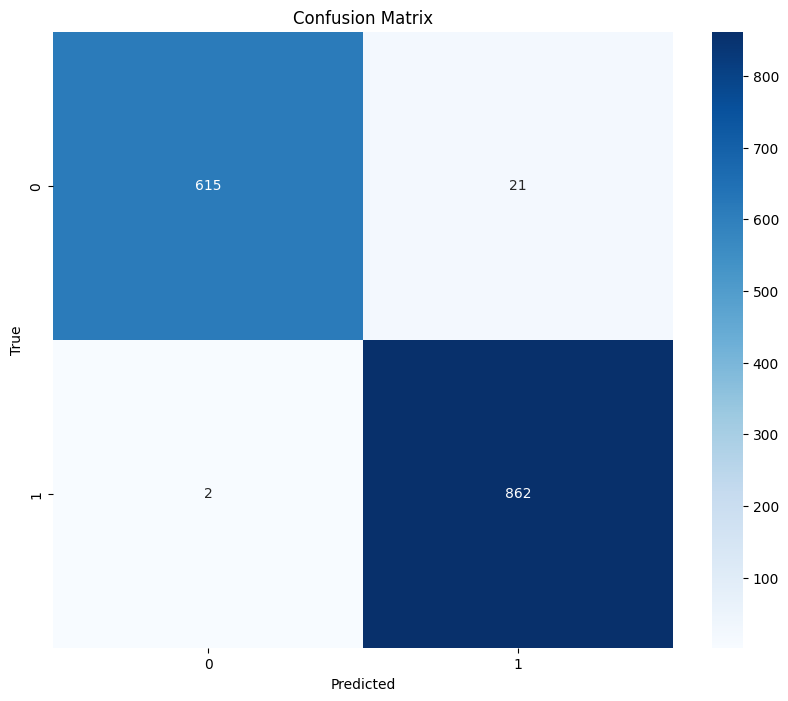

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [78]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_2",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,0.112800,0.031357,0.994000
2,0.028300,0.097860,0.980667
3,0.011800,0.096800,0.982667


TrainOutput(global_step=2250, training_loss=0.04334827831056383, metrics={'train_runtime': 1118.5843, 'train_samples_per_second': 32.184, 'train_steps_per_second': 2.011, 'total_flos': 4768826351616000.0, 'train_loss': 0.04334827831056383, 'epoch': 3.0})

In [80]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [81]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       636
           1       0.97      1.00      0.98       864

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



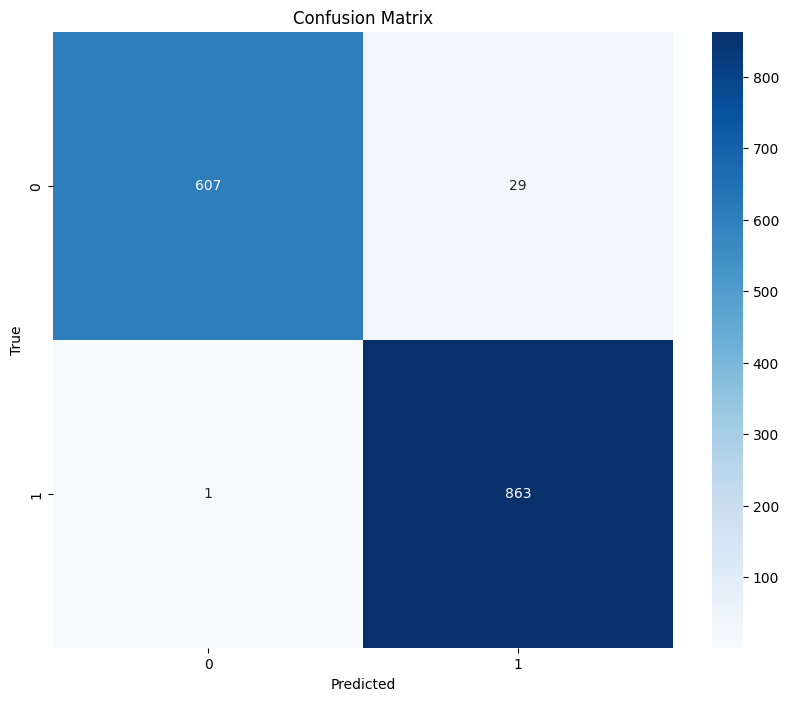

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset3 

In [83]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [84]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_3",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,0.137700,0.058682,0.985333
2,0.024300,0.049969,0.990667
3,0.012500,0.086149,0.985333


TrainOutput(global_step=2250, training_loss=0.050473357836405434, metrics={'train_runtime': 1116.4721, 'train_samples_per_second': 32.244, 'train_steps_per_second': 2.015, 'total_flos': 4768826351616000.0, 'train_loss': 0.050473357836405434, 'epoch': 3.0})

In [85]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [86]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       636
           1       0.97      1.00      0.98       864

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



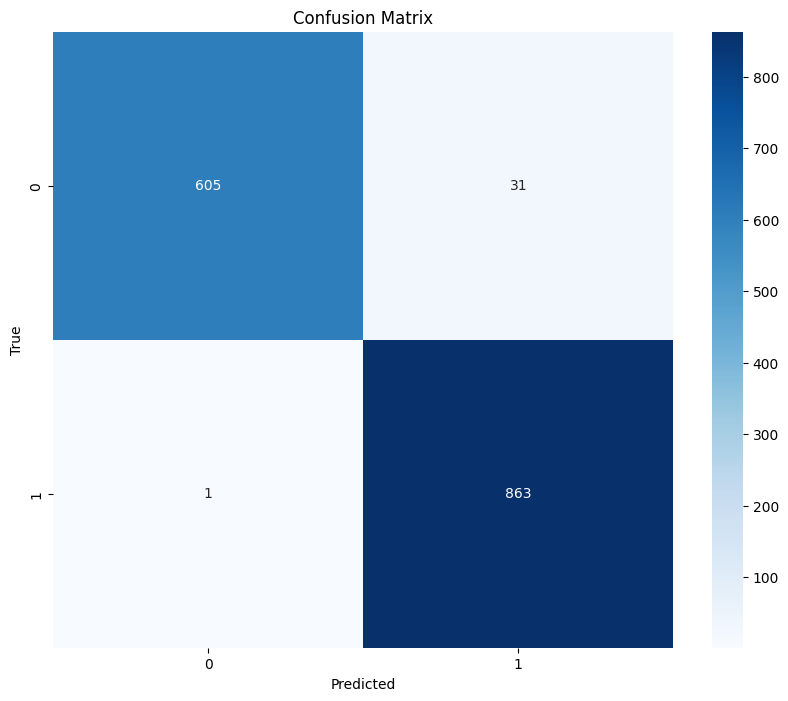

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset4

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./result_4",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df4_dataset,
    eval_dataset=val_df4_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df4_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset5

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_5",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df5_dataset,
    eval_dataset=val_df5_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df5_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset6

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_6",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df6_dataset,
    eval_dataset=val_df6_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df6_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset7

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_7",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df7_dataset,
    eval_dataset=val_df7_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df7_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Original dataset

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True
        
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results_8",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df8_dataset,
    eval_dataset=val_df8_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df8_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. LoRA or Freezing layers or full fine-tuning

- LoRA like adapter to based-model, no train at based model just only in adapter
- Freeze layer, freeze the weights of some layer and retrain other layers
- Full, retrain all parameters





## Sample to smaller size and training/validation/test split

In [ ]:
#df1 = df.sample(n = 15000,random_state = 192024)
#df1.shape

In [ ]:
'''from sklearn.model_selection import train_test_split

df1 = df1[['text','label']]

outcomename = 'label'
X = df1.drop(columns = outcomename)
Y = df1[outcomename]

featurename = X.columns
outcome_value = ["0","1"]
X.head()'''

In [ ]:
'''X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, Y, test_size = 0.2, random_state = 192024,stratify = Y)
print('training set = {} records, test_vali set= {} records'.format(X_train.shape[0],X_valid_test.shape[0]))
print('training set = {} records, test_vali set= {} records'.format(y_train.shape[0],y_valid_test.shape[0]))'''

In [ ]:
'''X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 192024,stratify = y_valid_test)
print('validation set = {} records, test set= {} records'.format(X_valid.shape[0],X_test.shape[0]))
print('validation set = {} records, test set= {} records'.format(y_valid.shape[0],y_test.shape[0]))'''